In [38]:
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun , WikipediaQueryRun
from langchain_community.tools.tavily_search import TavilySearchResults
import os
from dotenv import load_dotenv


load_dotenv()


os.environ["GROQ_API_KEY"]= os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"]= os.getenv("TAVILY_API_KEY")

In [39]:
# creating tool - arxiv for searching research paper information

arxiv_api_wrapper = ArxivAPIWrapper(top_k_results=2 ,doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=arxiv_api_wrapper ,description="Query Arxiv papers")
print(arxiv.name)

arxiv


In [40]:
# creating tool - wikipedia

wiki_api_wrapper = WikipediaAPIWrapper(top_k_results=2 ,doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=wiki_api_wrapper ,description="Query Arxiv papers")
print(wiki.name)

wikipedia


In [41]:
tavily = TavilySearchResults()

tavily.invoke("Give me recent ai news")

[{'title': 'AI News | Latest AI News, Analysis & Events',
  'url': 'https://www.artificialintelligence-news.com/',
  'content': 'March 4, 2025\nAutoscience Carl: The first AI scientist writing peer-reviewed papers\nApplications\nMarch 3, 2025\nDeep Learning\nAlibaba Qwen QwQ-32B: Scaled reinforcement learning showcase\nArtificial Intelligence\nMarch 6, 2025\nDeepSeek-R1 reasoning models rival OpenAI in performance\nArtificial Intelligence\nJanuary 20, 2025\nNew AI training techniques aim to overcome current challenges\nDeep & Reinforcement Learning\nNovember 28, 2024 [...] Artificial Intelligence\nMarch 14, 2025\nOpenAI and Google call for US government action to secure AI lead\n\nArtificial Intelligence\nMarch 14, 2025\nCBRE: Leveraging Artificial Intelligence for business growth\n\nAGI\nMarch 14, 2025\nManus AI agent: breakthrough in China’s agentic AI\n\nApplications\nMarch 13, 2025\nServiceNow deploys AI agents to boost enterprise workflows [...] AI News\nMarch 20, 2025\nUK ministe

In [42]:
# tools list

tools = [arxiv , wiki , tavily]

In [43]:
from langchain_groq import ChatGroq


llm = ChatGroq(model="qwen-qwq-32b")

llm.invoke("Who was the man of match in 2011 ICC world cup final")

AIMessage(content="\n<think>\nOkay, so I need to figure out who was the Man of the Match in the 2011 ICC World Cup Final. Let me start by recalling what I know. The 2011 World Cup was held in India, Sri Lanka, and Bangladesh. The final was played in Mumbai between India and Sri Lanka, right? I remember that the match went into a Super Over because the scores were tied after the 50 overs. \n\nFirst, I should confirm which players were key in that match. From what I remember, the Indian captain at the time was Mahendra Singh Dhoni. He was the wicketkeeper-batter. Sri Lanka had some key players like Tillakaratne Dilshan and Mahela Jayawardene. But the Man of the Match might not necessarily be from the winning team. Wait, in the Super Over, both teams had to bat and bowl again, so maybe the player who performed best in that situation got the award.\n\nI think the final was on April 2, 2011. The match ended with India winning by virtue of scoring more boundaries in the Super Over. But who w

In [44]:
llm_with_tools = llm.bind_tools(tools= tools)



In [45]:
# calling the wiki tool or llm may also answer in some case by its own

llm_with_tools.invoke("What is machine learning")


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_z03e', 'function': {'arguments': '{"query": "Machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 265, 'prompt_tokens': 320, 'total_tokens': 585, 'completion_time': 0.660790879, 'prompt_time': 0.036276535, 'queue_time': 0.376185358, 'total_time': 0.697067414}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_fbb7e6cc39', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-5a30e671-a4c9-4314-a7bd-f359734c43d3-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine learning'}, 'id': 'call_z03e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 320, 'output_tokens': 265, 'total_tokens': 585})

In [46]:
# for research paper related queries it calls arxiv tool

llm_with_tools.invoke("What is latest research paper on ai")


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_gfdx', 'function': {'arguments': '{"query": "AI"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 185, 'prompt_tokens': 323, 'total_tokens': 508, 'completion_time': 0.454387424, 'prompt_time': 0.05581029, 'queue_time': 0.39285911700000004, 'total_time': 0.510197714}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ffbcf6cb-8397-4c82-bc2f-d13935a35bbb-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'AI'}, 'id': 'call_gfdx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 323, 'output_tokens': 185, 'total_tokens': 508})

In [ ]:

# for recent advancements and things it used tally search as an tool to answer

llm_with_tools.invoke("What is recent match in ipl 2025 ")


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_3ft4', 'function': {'arguments': '{"query": "recent IPL match 2023 results"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 481, 'prompt_tokens': 329, 'total_tokens': 810, 'completion_time': 1.169203792, 'prompt_time': 0.027006808, 'queue_time': 0.232774001, 'total_time': 1.1962106000000001}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e671a94c-42e3-49bf-956f-9f203ab74f58-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent IPL match 2023 results'}, 'id': 'call_3ft4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 329, 'output_tokens': 481, 'total_tokens': 810})

In [47]:
# let's not create workflow within langgraph

from typing_extensions import TypedDict
from typing import Literal, Annotated
from IPython.display import display,Image
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.graph.message import add_messages, AnyMessage


In [48]:
# building state for the graph / worklow

class State(TypedDict):
    messages : Annotated[list[AnyMessage], add_messages]

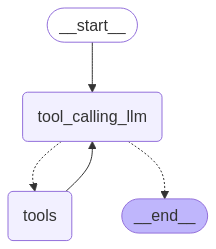

In [54]:
# creating nodes

def tool_calling_llm(state:State):
    return {
        "messages" : llm_with_tools.invoke(state["messages"])
    }

# Build Graph

builder = StateGraph(State)
builder.add_node("tool_calling_llm" , tool_calling_llm)

builder.add_node("tools" , ToolNode(tools))


# Add Edge

builder.add_edge(START , "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm" , tools_condition)

builder.add_edge("tools" , "tool_calling_llm")

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [55]:
# test it

# see it uses tool - wiki to answer

meesages = graph.invoke({"messages" : "what is machine learning"})

for message in meesages['messages']:
    message.pretty_print()


================================ Human Message =================================

what is machine learning
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_v9xt)
 Call ID: call_v9xt
  Args:
    query: machine learning
================================= Tool Message =================================
Name: wikipedia

Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.
ML fi
================================== Ai Message ==================================

Machine learning (ML) is a branch of ar

In [56]:
# test it

meesages = graph.invoke({"messages" : "Hi my name is jassi , tell me what top festival in india"})

for message in meesages['messages']:
    message.pretty_print()


================================ Human Message =================================

Hi my name is jassi , tell me what top festival in india
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_9wcv)
 Call ID: call_9wcv
  Args:
    query: List of festivals in India
================================= Tool Message =================================
Name: wikipedia

Page: List of festivals in India
Summary: This is a partial listing of festivals in India.

Page: List of film festivals in India
Summary: This is a list of film festivals in India.
================================== Ai Message ==================================

India is known for its rich cultural diversity and numerous festivals. Some of the most prominent and widely celebrated festivals across the country include:

1. **Diwali** (Festival of Lights) – A major Hindu festival celebrating light over darkness, good over evil, with lanterns, fireworks, and family gatherings.